# 02 Производство сетей
Производство сетей на основе манипуляции с общей таблицей

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Читаем общую таблицу по голосованиям с диска

In [39]:
votes_table_com = pd.read_csv('votes_table.csv')
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",['UKRAINE--POLITICAL CONDITIONS']
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",['UKRAINE--POLITICAL CONDITIONS']
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",['UKRAINE--POLITICAL CONDITIONS']
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",['UKRAINE--POLITICAL CONDITIONS']
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",['UKRAINE--POLITICAL CONDITIONS']


## 2. Data processing

In [10]:
# редактирование таблицы
# votes_table_com.drop([0, 1])

,Data,Resolution,Title,Uri,Tags


In [5]:
# редактирование тэгов резолюции

In [ ]:
# Агрегация общей таблицы для производства сети

## 3. Net making

###  1. Создание сводной таблицамы голосований

In [155]:
vote_array = []

votes_table_com['Resolution'].apply(
    lambda x: vote_array.append(
        pd.read_csv('resolution_vote/' + x.replace('/', '_') + '.csv', index_col = 'Country')
    )
)

0    None
1    None
2    None
3    None
4    None
Name: Resolution, dtype: object

In [1400]:
len(vote_array)

5

In [1399]:
vote_array[0]

,A/RES/ES-11/5
Country,
AFGHANISTAN,1.0
ALBANIA,1.0
ALGERIA,0.0
ANDORRA,1.0
ANGOLA,0.0
...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN
VIET NAM,0.0
YEMEN,0.0


In [106]:
# Test беру два первых столца с голосованием
#vote_array = vote_array[0:2]
#len(vote_array)

2

In [1401]:
common_table = vote_array[0]

for index in range(1, len(vote_array)):
    common_table = pd.merge(common_table, vote_array[index], how='outer', left_index=True, right_index=True) 

In [1402]:
common_table.head()

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
AFGHANISTAN,1.0,1.0,NaN,1.0,1.0
ALBANIA,1.0,1.0,1.0,1.0,1.0
ALGERIA,0.0,0.0,-1.0,0.0,0.0
ANDORRA,1.0,1.0,1.0,1.0,1.0
ANGOLA,0.0,1.0,0.0,0.0,0.0


In [1403]:
len(common_table.index)

196

### Убираем разное написание Турции

In [1358]:
common_table[common_table.index == 'TURKEY']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKEY,NaN,NaN,1.0,1.0,1.0


In [1391]:
common_table[common_table.index == 'TURKIYE']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKIYE,1.0,NaN,NaN,NaN,NaN


In [1360]:
common_table[common_table.index == 'TÜRKIYE']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TÜRKIYE,NaN,1.0,NaN,NaN,NaN


In [1361]:
#list(common_table[(common_table.index == 'TURKEY') + (common_table.index == 'TURKIYE') + (common_table.index == 'TÜRKIYE')].sum())

In [1392]:
common_table.loc[["TURKEY", "TURKIYE", 'TÜRKIYE'], list(common_table.columns)]

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKEY,NaN,NaN,1.0,1.0,1.0
TURKIYE,1.0,NaN,NaN,NaN,NaN
TÜRKIYE,NaN,1.0,NaN,NaN,NaN


In [1404]:
common_table.loc['TURKEY'] = common_table.loc[["TURKEY", "TURKIYE", 'TÜRKIYE'], list(common_table.columns)].sum()
common_table.drop(["TURKIYE", 'TÜRKIYE'], inplace = True)

In [1405]:
len(common_table.index)

194

In [1397]:
net_table_weight_val = pd.DataFrame(common_table)

net_table_weight_val['Solid_val'] = net_table_weight_val[list(net_table_weight_val.columns)[0:]].sum(axis=1)
net_table_weight_val.drop(list(net_table_weight_val.columns)[0:-1], inplace=True, axis=1)

net_table_weight_val = net_table_weight_val[net_table_weight_val.Solid_val != 0]

net_table_weight_val

,Solid_val
Country,
AFGHANISTAN,4.0
ALBANIA,5.0
ALGERIA,-1.0
ANDORRA,5.0
ANGOLA,1.0
...,...
VANUATU,4.0
VIET NAM,-1.0
YEMEN,3.0


(array([ 4.,  0.,  1.,  0.,  1.,  0.,  7.,  0., 10.,  0.,  0.,  0.,  7.,
         0.,  9.,  0., 31.,  0., 29.,  0., 75.]),
 array([-5.        , -4.52380952, -4.04761905, -3.57142857, -3.0952381 ,
        -2.61904762, -2.14285714, -1.66666667, -1.19047619, -0.71428571,
        -0.23809524,  0.23809524,  0.71428571,  1.19047619,  1.66666667,
         2.14285714,  2.61904762,  3.0952381 ,  3.57142857,  4.04761905,
         4.52380952,  5.        ]),
 <BarContainer object of 21 artists>)

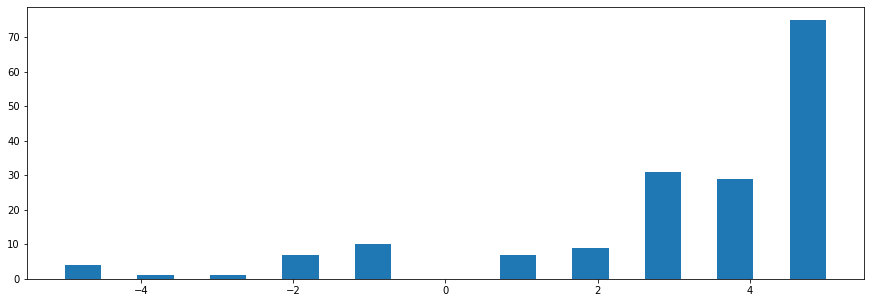

In [1366]:
figure(figsize=(15, 5))
plt.hist(net_table_weight_val['Solid_val'], bins=21)

(array([17.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0., 32.,  0.,  0.,
         0.,  0., 30.,  0.,  0.,  0.,  0., 79.]),
 array([1.        , 1.19047619, 1.38095238, 1.57142857, 1.76190476,
        1.95238095, 2.14285714, 2.33333333, 2.52380952, 2.71428571,
        2.9047619 , 3.0952381 , 3.28571429, 3.47619048, 3.66666667,
        3.85714286, 4.04761905, 4.23809524, 4.42857143, 4.61904762,
        4.80952381, 5.        ]),
 <BarContainer object of 21 artists>)

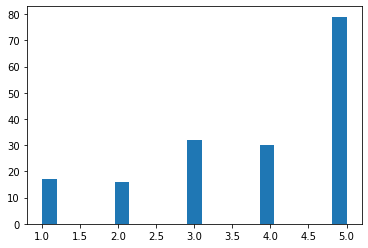

In [1374]:
plt.hist(abs(net_table_weight_val['Solid_val']), bins=21)

###  2. Вычисление показателя солидарности для каждого голосования

In [404]:
# принимает таблицу с рещультатами голосования common_table
# возвращает два массива c парной узлов (ребром)

def get_edges(table):
    nodes_1 = []
    nodes_2 = []
    count_index = len(common_table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):

            nodes_1.append(table.index[index_first])
            nodes_2.append(table.index[index_second])
        
    return [nodes_1, nodes_2]

In [405]:
# принимает таблицу с результатами голосования из common_table и название расчетного столбца голосования 
# возвращает массив оценки солидарности шголосования solid_val

def get_solid_val(table, item):
    solid_val = []
    count_index = len(table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):
            
            # сравнение индексов голосования
            if (pd.isnull(table.iloc[index_first][item]) or pd.isnull(table.iloc[index_second][item])): 
                solid_val.append(np.nan) 
            else: 
                # Это значит, что если оба воздержались, то 0 == 0 это True
                solid_val.append(table.iloc[index_first][item] == table.iloc[index_second][item])
                # Нужно ли давать 1 если 1 == 1, -1 если -1 == -1... как быть с 0?
            
    return solid_val

In [1368]:
len(get_edges(common_table)[0])

18721

In [1369]:
(len(common_table)*(len(common_table) - 1))/2

18721.0

In [1409]:
common_table

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
AFGHANISTAN,1.0,1.0,NaN,1.0,1.0
ALBANIA,1.0,1.0,1.0,1.0,1.0
ALGERIA,0.0,0.0,-1.0,0.0,0.0
ANDORRA,1.0,1.0,1.0,1.0,1.0
ANGOLA,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
VIET NAM,0.0,0.0,-1.0,0.0,0.0
YEMEN,0.0,1.0,0.0,1.0,1.0


In [1371]:
#common_table[common_table.index == 'UKRAINE']
common_table[common_table.index == 'RUSSIAN FEDERATION']
#RUSSIAN FEDERATION


,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1,Solid_val
Country,,,,,,
RUSSIAN FEDERATION,-1.0,-1.0,-1.0,-1.0,-1.0,-5.0


In [1410]:
# создаем таблицу ребер сети

net_table = pd.DataFrame()

# создаем все ребра сети
nodes_arr = get_edges(common_table)
net_table['Nodes_1'] = nodes_arr[0]
net_table['Nodes_2'] = nodes_arr[1]

# заполняем результаты голосований
for item in common_table.columns: 
    net_table[item] = get_solid_val(common_table, item)

net_table

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
0,AFGHANISTAN,ALBANIA,True,True,NaN,True,True
1,AFGHANISTAN,ALGERIA,False,False,NaN,False,False
2,AFGHANISTAN,ANDORRA,True,True,NaN,True,True
3,AFGHANISTAN,ANGOLA,False,True,NaN,False,False
4,AFGHANISTAN,ANTIGUA AND BARBUDA,False,True,NaN,True,True
...,...,...,...,...,...,...,...
18716,VIET NAM,ZAMBIA,False,False,NaN,False,False
18717,VIET NAM,ZIMBABWE,False,True,True,True,True
18718,YEMEN,ZAMBIA,False,True,NaN,True,True
18719,YEMEN,ZIMBABWE,False,False,False,False,False


In [1427]:
net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table[((net_table['Nodes_1'] == 'THAILAND') & (net_table['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]

#RUSSIAN FEDERATION


,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
17446,RUSSIAN FEDERATION,RWANDA,False,False,NaN,False,False
17447,RUSSIAN FEDERATION,SAINT KITTS AND NEVIS,False,False,False,False,False
17448,RUSSIAN FEDERATION,SAINT LUCIA,False,False,False,False,False
17449,RUSSIAN FEDERATION,SAINT VINCENT AND THE GRENADINES,False,False,False,False,False
17450,RUSSIAN FEDERATION,SAMOA,False,False,False,False,False
17451,RUSSIAN FEDERATION,SAN MARINO,False,False,False,False,False
17452,RUSSIAN FEDERATION,SAO TOME AND PRINCIPE,NaN,NaN,NaN,False,False
17453,RUSSIAN FEDERATION,SAUDI ARABIA,False,False,False,False,False
17454,RUSSIAN FEDERATION,SENEGAL,NaN,False,False,False,False
17455,RUSSIAN FEDERATION,SERBIA,False,False,False,False,False


In [636]:
list(common_table.columns)

['A/RES/ES-11/5',
 'A/RES/ES-11/4',
 'A/RES/ES-11/3',
 'A/RES/ES-11/2',
 'A/RES/ES-11/1']

### 3. Вычисление коэффициента солидарности (веса) для каждого из ребер

`Solid_val` коэффициент солидарности (вес ребер)

In [1502]:
#net_table_weight = net_table.replace({True: 1, False: -1})
net_table_weight = net_table.replace({True: 1, False: 0})

#net_table_weight = net_table

net_table_weight['Solid_val'] = abs(net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1))
#net_table_weight['Solid_val'] = net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1)


net_table_weight.drop(list(net_table_weight.columns)[2:-1], inplace=True, axis=1)

net_table_weight = net_table_weight[net_table_weight.Solid_val != 0]
# выбираем все значения больще n
#net_table_weight = net_table_weight[net_table_weight.Solid_val >=5 ]

net_table_weight

,Nodes_1,Nodes_2,Solid_val
0,AFGHANISTAN,ALBANIA,4.0
2,AFGHANISTAN,ANDORRA,4.0
3,AFGHANISTAN,ANGOLA,1.0
4,AFGHANISTAN,ANTIGUA AND BARBUDA,3.0
5,AFGHANISTAN,ARGENTINA,4.0
...,...,...,...
18708,VANUATU,YEMEN,4.0
18709,VANUATU,ZAMBIA,4.0
18715,VIET NAM,YEMEN,1.0
18717,VIET NAM,ZIMBABWE,4.0


In [1503]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
net_table_weight[((net_table_weight['Nodes_1'] == 'AFGHANISTAN') & (net_table_weight['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]


,Nodes_1,Nodes_2,Solid_val
4,AFGHANISTAN,ANTIGUA AND BARBUDA,3.0


In [1504]:
set(net_table_weight['Solid_val'].isna())

{False}

In [1505]:
len(net_table_weight)

13431

In [1506]:
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 5])

In [1507]:
len(net_table_weight['Solid_val'])
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 0])

13431

(array([1765.,    0.,    0.,    0., 1599.,    0.,    0.,    0.,    0.,
        3478.,    0.,    0.,    0., 3369.,    0.,    0.,    0., 3220.]),
 array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
        2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ,
        3.22222222, 3.44444444, 3.66666667, 3.88888889, 4.11111111,
        4.33333333, 4.55555556, 4.77777778, 5.        ]),
 <BarContainer object of 18 artists>)

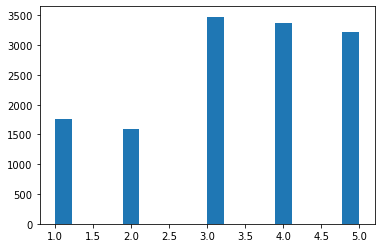

In [1508]:
plt.hist(net_table_weight['Solid_val'], bins=18)

### 4. Строим сеть 

In [1509]:
import networkx as nx
from matplotlib.pyplot import figure

In [1510]:
G = nx.Graph()
#G.add_nodes_from(list(net_table_weight_val.index))
net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

0        None
2        None
3        None
4        None
5        None
         ... 
18708    None
18709    None
18715    None
18717    None
18718    None
Length: 13431, dtype: object

In [1511]:
len(G.nodes())

190

In [1512]:
nx.is_connected(G)

True

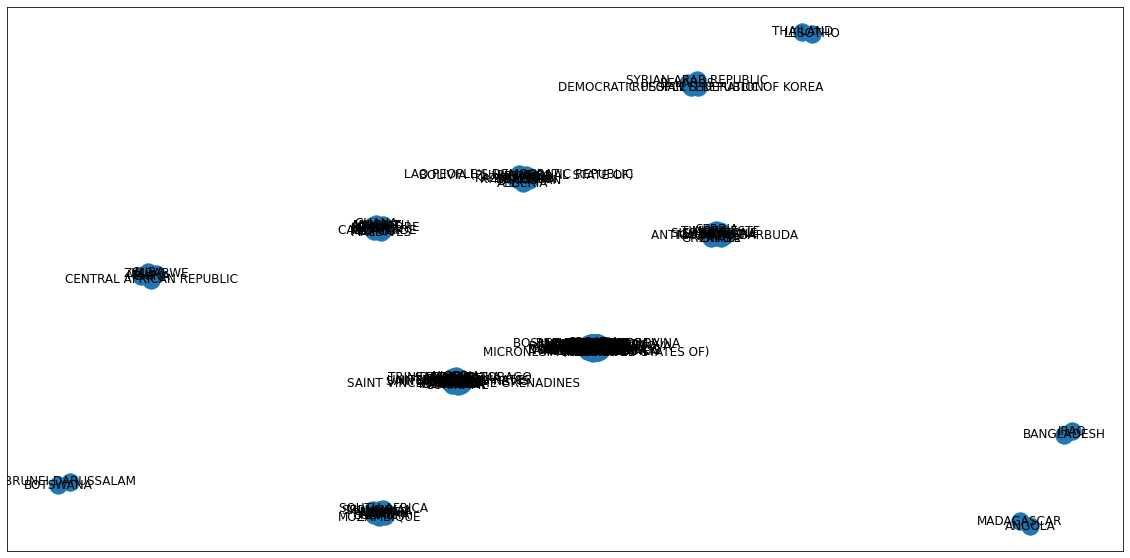

In [1493]:
figure(figsize=(20, 10))
nx.draw_networkx(G)

In [1494]:
len(sorted(nx.connected_components(G)))

12

In [1294]:
nx.number_connected_components(G)
len(sorted(nx.connected_components(G)))


country_arr_test = list(nx.connected_components(G_one_vote))[2]

In [1552]:
#country_name = 'TURKIYE'
country_name = 'RUSSIAN FEDERATION'
country_name = 'UNITED STATES'
country_name = 'IRAN'
#UNITED STATES OF AMERICA

for index in range (0, len(list(nx.connected_components(G)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(G))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(G))[index]
    print(country_arr_test)
    print('______________')





0
False

{'SENEGAL', 'SRI LANKA', 'PHILIPPINES', 'BOLIVIA (PLURINATIONAL STATE OF)', 'BELGIUM', 'MONTENEGRO', 'CONGO', 'LIBYA', 'GAMBIA', 'EL SALVADOR', 'ALGERIA', 'NIGER', 'TONGA', 'GRENADA', 'ECUADOR', 'ARGENTINA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'MALI', 'COSTA RICA', 'UNITED KINGDOM', 'UNITED REPUBLIC OF TANZANIA', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'UZBEKISTAN', 'CUBA', 'CHILE', 'NICARAGUA', 'ERITREA', 'BRAZIL', 'GABON', 'GREECE', 'NIGERIA', 'SAO TOME AND PRINCIPE', 'CHAD', 'HONDURAS', 'SAN MARINO', 'MALDIVES', 'SINGAPORE', 'SOMALIA', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'NAMIBIA', 'LUXEMBOURG', 'ESWATINI', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'INDIA', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'UGANDA', 'SLOVAKIA', 'CAMEROON', 

In [1454]:
common_table[common_table.index == 'NEPAL']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
NEPAL,0.0,1.0,0.0,1.0,1.0


In [1451]:
common_table[common_table.index == 'QATAR']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
QATAR,1.0,1.0,0.0,1.0,1.0


In [1430]:
net_table[((net_table['Nodes_1'] == 'LESOTHO') & (net_table['Nodes_2'] == 'THAILAND'))]

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
14042,LESOTHO,THAILAND,True,True,True,True,True


In [1432]:
net_table[net_table['Nodes_1'] == 'LESOTHO']

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
13968,LESOTHO,LIBERIA,False,False,False,True,True
13969,LESOTHO,LIBYA,True,False,False,True,True
13970,LESOTHO,LIECHTENSTEIN,False,False,False,True,True
13971,LESOTHO,LITHUANIA,False,False,False,True,True
13972,LESOTHO,LUXEMBOURG,False,False,False,True,True
...,...,...,...,...,...,...,...
14060,LESOTHO,VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
14061,LESOTHO,VIET NAM,True,True,False,False,False
14062,LESOTHO,YEMEN,True,False,True,True,True
14063,LESOTHO,ZAMBIA,False,False,NaN,True,True


In [645]:
#country_name = 'RUSSIAN FEDERATION'
country_name = 'UKRAINE'

if country_name in country_arr_test: print('True')
else: print('False')

False


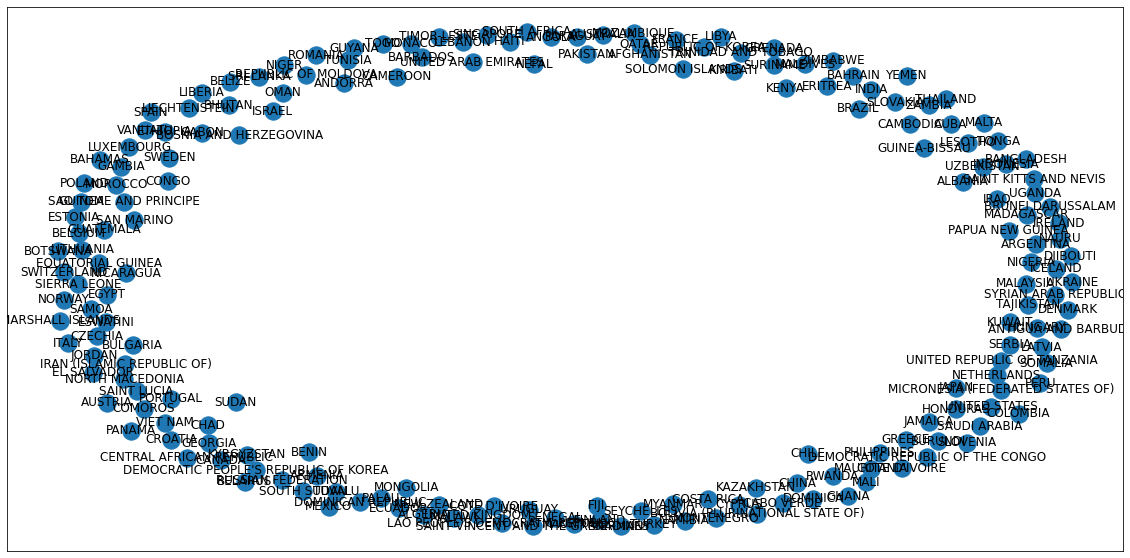

In [1531]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 6
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [1532]:
print(len(sorted(nx.connected_components(F))))
print(len(G.nodes()))

190
190


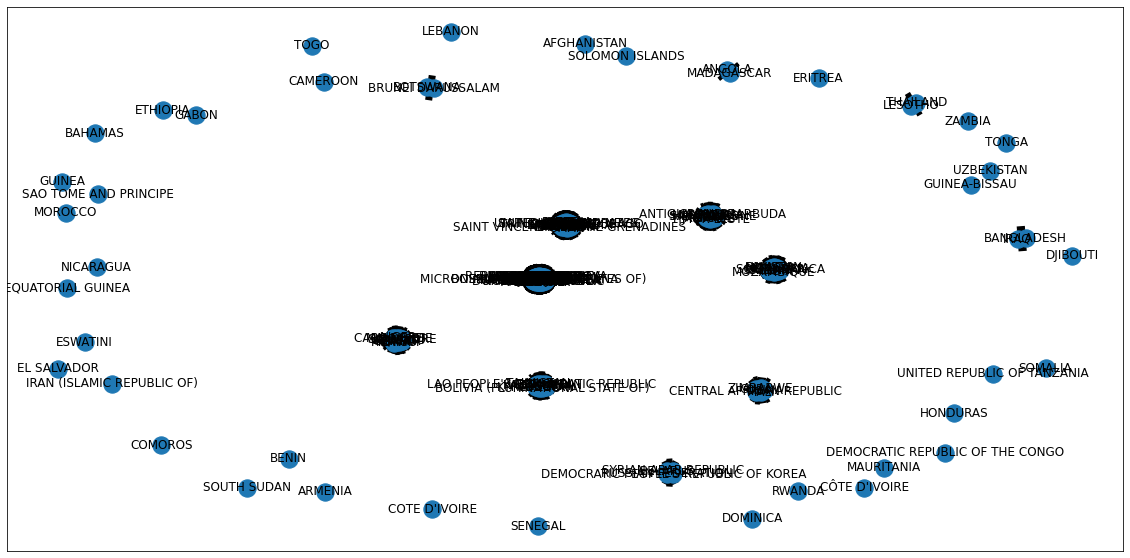

In [1554]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 5
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [1555]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

48
190


In [1556]:
print(list(nx.connected_components(F))[1])

{'CYPRUS', 'PARAGUAY', 'DOMINICAN REPUBLIC', 'GUATEMALA', 'PHILIPPINES', 'NEW ZEALAND', 'REPUBLIC OF KOREA', 'JAPAN', 'BOSNIA AND HERZEGOVINA', 'LITHUANIA', 'MALAWI', 'MALTA', 'AUSTRALIA', 'SEYCHELLES', 'CROATIA', 'BELGIUM', 'GERMANY', 'MONTENEGRO', 'FRANCE', 'SLOVENIA', 'PERU', 'PANAMA', 'SWEDEN', 'MICRONESIA (FEDERATED STATES OF)', 'ECUADOR', 'ARGENTINA', 'MYANMAR', 'HUNGARY', 'IRELAND', 'PAPUA NEW GUINEA', 'AUSTRIA', 'DENMARK', 'GEORGIA', 'TUVALU', 'ROMANIA', 'COSTA RICA', 'SPAIN', 'BULGARIA', 'COLOMBIA', 'UNITED KINGDOM', 'SLOVAKIA', 'CANADA', 'MONACO', 'REPUBLIC OF MOLDOVA', 'SAMOA', 'UNITED STATES', 'ALBANIA', 'CHILE', 'UKRAINE', 'ITALY', 'ICELAND', 'GREECE', 'NORTH MACEDONIA', 'FIJI', 'CHAD', 'SAN MARINO', 'MARSHALL ISLANDS', 'LATVIA', 'NETHERLANDS', 'POLAND', 'LIBERIA', 'SWITZERLAND', 'LIECHTENSTEIN', 'LUXEMBOURG', 'NORWAY', 'PALAU', 'KIRIBATI', 'PORTUGAL', 'NAURU', 'TURKEY', 'CZECHIA', 'FINLAND', 'URUGUAY', 'ESTONIA', 'ANDORRA'}


In [1562]:
country_name = 'IRAN (ISLAMIC REPUBLIC OF)'
country_name = 'HUNGARY'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
False

{'AFGHANISTAN'}
______________

1
True

{'CYPRUS', 'PARAGUAY', 'DOMINICAN REPUBLIC', 'GUATEMALA', 'PHILIPPINES', 'NEW ZEALAND', 'REPUBLIC OF KOREA', 'JAPAN', 'BOSNIA AND HERZEGOVINA', 'LITHUANIA', 'MALAWI', 'MALTA', 'AUSTRALIA', 'SEYCHELLES', 'CROATIA', 'BELGIUM', 'GERMANY', 'MONTENEGRO', 'FRANCE', 'SLOVENIA', 'PERU', 'PANAMA', 'SWEDEN', 'MICRONESIA (FEDERATED STATES OF)', 'ECUADOR', 'ARGENTINA', 'MYANMAR', 'HUNGARY', 'IRELAND', 'PAPUA NEW GUINEA', 'AUSTRIA', 'DENMARK', 'GEORGIA', 'TUVALU', 'ROMANIA', 'COSTA RICA', 'SPAIN', 'BULGARIA', 'COLOMBIA', 'UNITED KINGDOM', 'SLOVAKIA', 'CANADA', 'MONACO', 'REPUBLIC OF MOLDOVA', 'SAMOA', 'UNITED STATES', 'ALBANIA', 'CHILE', 'UKRAINE', 'ITALY', 'ICELAND', 'GREECE', 'NORTH MACEDONIA', 'FIJI', 'CHAD', 'SAN MARINO', 'MARSHALL ISLANDS', 'LATVIA', 'NETHERLANDS', 'POLAND', 'LIBERIA', 'SWITZERLAND', 'LIECHTENSTEIN', 'LUXEMBOURG', 'NORWAY', 'PALAU', 'KIRIBATI', 'PORTUGAL', 'NAURU', 'TURKEY', 'CZECHIA', 'FINLAND', 'URUGUAY', 'ESTONIA', 'ANDORRA'

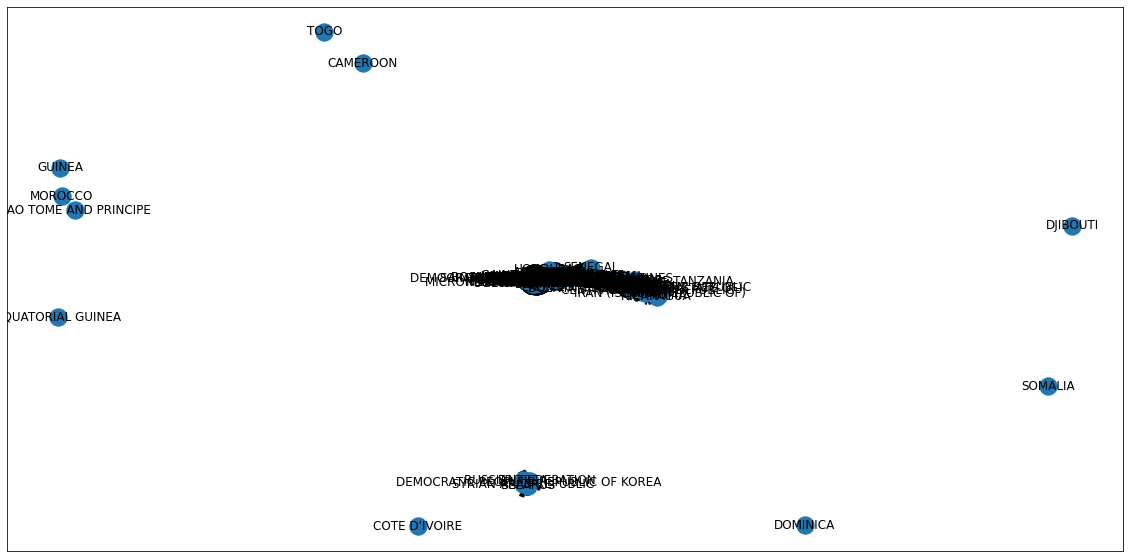

In [1543]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 4
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [1544]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

12
190


In [1545]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
False

{'SENEGAL', 'SRI LANKA', 'PHILIPPINES', 'BOLIVIA (PLURINATIONAL STATE OF)', 'BELGIUM', 'MONTENEGRO', 'CONGO', 'LIBYA', 'GAMBIA', 'EL SALVADOR', 'ALGERIA', 'NIGER', 'ECUADOR', 'ARGENTINA', 'GRENADA', 'TONGA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'MALI', 'COSTA RICA', 'UNITED KINGDOM', 'UNITED REPUBLIC OF TANZANIA', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'UZBEKISTAN', 'CUBA', 'CHILE', 'NICARAGUA', 'GREECE', 'BRAZIL', 'NIGERIA', 'GABON', 'CHAD', 'SAN MARINO', 'SINGAPORE', 'MALDIVES', 'HONDURAS', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'NAMIBIA', 'LUXEMBOURG', 'ESWATINI', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'INDIA', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'UGANDA', 'SLOVAKIA', 'ITALY', 'BOTSWANA', 'OMAN', 'LATVIA', 'NETHERLANDS', 'NORW

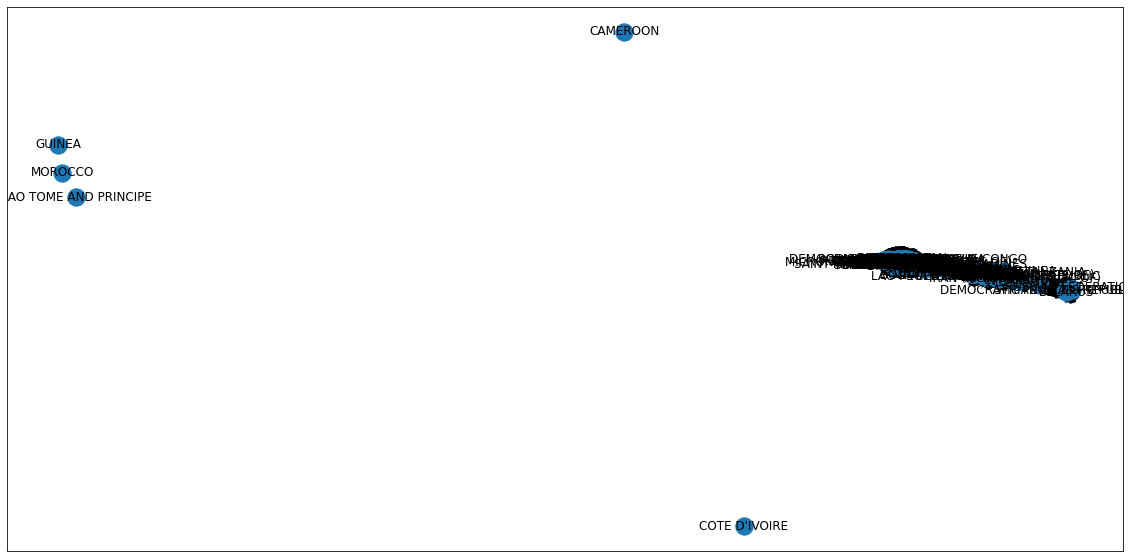

In [1546]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 3
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [1547]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

6
190


In [1548]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
True

{'SENEGAL', 'SRI LANKA', 'PHILIPPINES', 'BOLIVIA (PLURINATIONAL STATE OF)', 'BELGIUM', 'MONTENEGRO', 'CONGO', 'LIBYA', 'GAMBIA', 'EL SALVADOR', 'ALGERIA', 'NIGER', 'TONGA', 'GRENADA', 'ECUADOR', 'ARGENTINA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'MALI', 'COSTA RICA', 'UNITED KINGDOM', 'UNITED REPUBLIC OF TANZANIA', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'UZBEKISTAN', 'CUBA', 'CHILE', 'NICARAGUA', 'ERITREA', 'BRAZIL', 'GABON', 'GREECE', 'NIGERIA', 'CHAD', 'SAN MARINO', 'SINGAPORE', 'MALDIVES', 'SOMALIA', 'HONDURAS', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'NAMIBIA', 'LUXEMBOURG', 'ESWATINI', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'INDIA', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'UGANDA', 'SLOVAKIA', 'ITALY', 'BOTSWANA', 'OMAN', 'LATVIA',

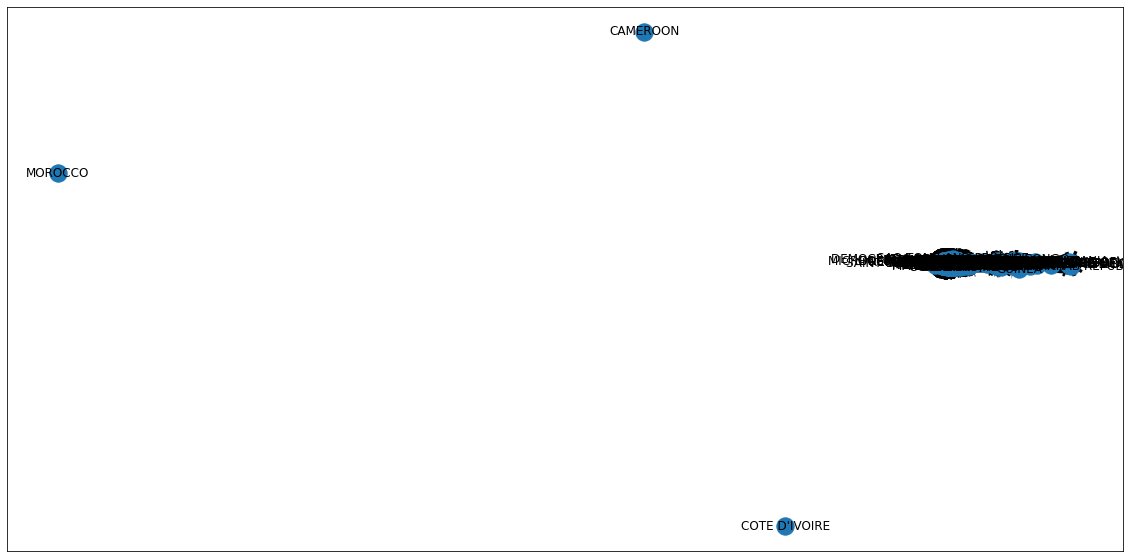

In [1549]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 2
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [1550]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

4
190


In [1551]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
True

{'SENEGAL', 'SRI LANKA', 'PHILIPPINES', 'BOLIVIA (PLURINATIONAL STATE OF)', 'BELGIUM', 'MONTENEGRO', 'CONGO', 'LIBYA', 'GAMBIA', 'EL SALVADOR', 'ALGERIA', 'NIGER', 'TONGA', 'GRENADA', 'ECUADOR', 'ARGENTINA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'MALI', 'COSTA RICA', 'UNITED KINGDOM', 'UNITED REPUBLIC OF TANZANIA', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'UZBEKISTAN', 'CUBA', 'CHILE', 'NICARAGUA', 'ERITREA', 'BRAZIL', 'GABON', 'GREECE', 'NIGERIA', 'SAO TOME AND PRINCIPE', 'CHAD', 'HONDURAS', 'SAN MARINO', 'MALDIVES', 'SINGAPORE', 'SOMALIA', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'NAMIBIA', 'LUXEMBOURG', 'ESWATINI', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'INDIA', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'UGANDA', 'SLOVAKIA', 'ITALY', 'BOT

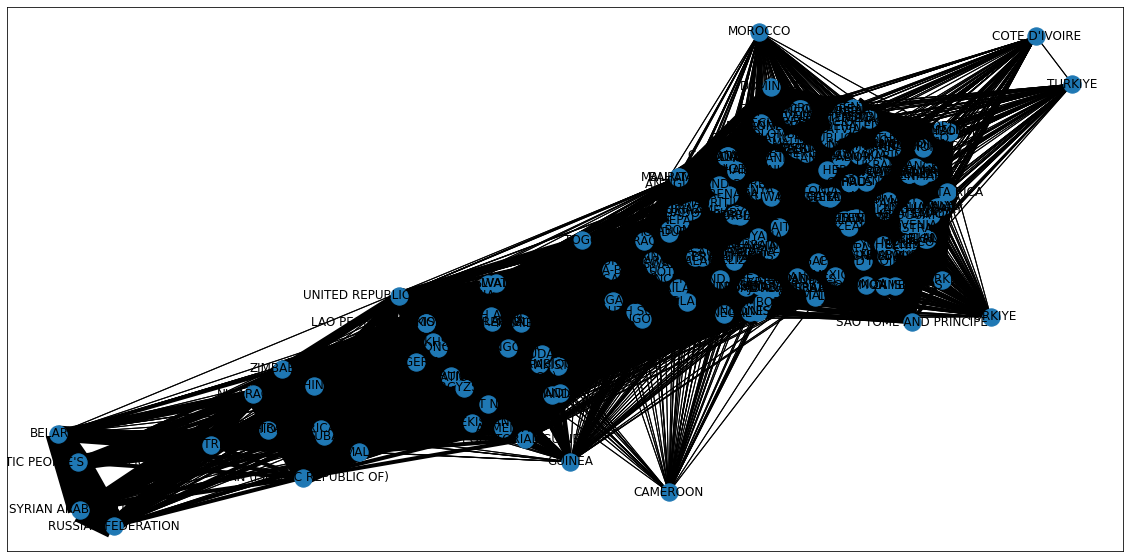

In [762]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 1
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [763]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

1

### 5. Экспорт в Gephi

In [226]:
nx.write_gexf(G, "UN_first.gexf")

## Проверка простой сети по одому голосованию 

In [1144]:
net_table.head()

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
0,AFGHANISTAN,ALBANIA,True,True,NaN,True,True
1,AFGHANISTAN,ALGERIA,False,False,NaN,False,False
2,AFGHANISTAN,ANDORRA,True,True,NaN,True,True
3,AFGHANISTAN,ANGOLA,False,True,NaN,False,False
4,AFGHANISTAN,ANTIGUA AND BARBUDA,False,True,NaN,True,True


In [1145]:
net_table_one_vote = pd.DataFrame(net_table)
net_table_one_vote

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
0,AFGHANISTAN,ALBANIA,True,True,NaN,True,True
1,AFGHANISTAN,ALGERIA,False,False,NaN,False,False
2,AFGHANISTAN,ANDORRA,True,True,NaN,True,True
3,AFGHANISTAN,ANGOLA,False,True,NaN,False,False
4,AFGHANISTAN,ANTIGUA AND BARBUDA,False,True,NaN,True,True
...,...,...,...,...,...,...,...
19105,VIET NAM,ZAMBIA,False,False,NaN,False,False
19106,VIET NAM,ZIMBABWE,False,True,True,True,True
19107,YEMEN,ZAMBIA,False,True,NaN,True,True
19108,YEMEN,ZIMBABWE,False,False,False,False,False


In [1146]:
#net_table.drop(list(list(net_table_one_vote.columns)[2:], inplace=True, axis=1)

net_table_one_vote.drop(list(net_table_one_vote.columns)[4:], inplace=True, axis=1)
net_table_one_vote.drop(list(net_table_one_vote.columns)[2], inplace=True, axis=1)

#net_table_one_vote.drop(list(net_table_one_vote.columns)[5:], inplace=True, axis=1)
#net_table_one_vote.drop(list(net_table_one_vote.columns)[2:4], inplace=True, axis=1)

In [1256]:
list(net_table_one_vote.columns)

['Nodes_1', 'Nodes_2', 'A/RES/ES-11/4']

In [1267]:
net_table_one_vote

,Nodes_1,Nodes_2,A/RES/ES-11/4
0,AFGHANISTAN,ALBANIA,True
1,AFGHANISTAN,ALGERIA,False
2,AFGHANISTAN,ANDORRA,True
3,AFGHANISTAN,ANGOLA,True
4,AFGHANISTAN,ANTIGUA AND BARBUDA,True
...,...,...,...
19105,VIET NAM,ZAMBIA,False
19106,VIET NAM,ZIMBABWE,True
19107,YEMEN,ZAMBIA,True
19108,YEMEN,ZIMBABWE,False


### Net building

In [1268]:
from numpy.random import default_rng
rng = default_rng()

In [1269]:
net_table_one_vote_weight = net_table_one_vote.replace({True: 1, False: 0})
#net_table_weight = net_table

# Коцаем табличку
net_table_one_vote_weight.drop([net_table_one_vote_weight.index[x] for x in rng.choice(19109, size=18400, replace=False)], inplace=True)

#net_table_one_vote_weight['A/RES/ES-11/5'] = abs(net_table_one_vote_weight[list(net_table_one_vote_weight.columns)[2:]].sum(axis=1))
#net_table_weight.drop(list(net_table_weight.columns)[2:-1], inplace=True, axis=1)

net_table_one_vote_weight = net_table_one_vote_weight[net_table_one_vote_weight['A/RES/ES-11/4'] != 0]
#net_table_weight = net_table_weight[net_table_weight.Solid_val > 5]
net_table_one_vote_weight.dropna(inplace = True)

net_table_one_vote_weight

,Nodes_1,Nodes_2,A/RES/ES-11/4
75,AFGHANISTAN,HUNGARY,1.0
99,AFGHANISTAN,LITHUANIA,1.0
143,AFGHANISTAN,RWANDA,1.0
147,AFGHANISTAN,SAMOA,1.0
166,AFGHANISTAN,SWEDEN,1.0
...,...,...,...
18842,TIMOR-LESTE,TÜRKIYE,1.0
18844,TIMOR-LESTE,UKRAINE,1.0
19010,TÜRKIYE,UNITED STATES,1.0
19025,UGANDA,UZBEKISTAN,1.0


In [1270]:
# Коцаем таблицу для проверки изменения числа connected components
#droping_index = np.random.randint(1,10000,40)

# testic
#[x for x in droping_index]
#list(map(lambda x: print(x), droping_index))

#net_table_one_vote_weight.drop([net_table_one_vote_weight.index[x] for x in np.random.randint(1,10750,10000)], inplace=True)

In [1271]:
G_one_vote = nx.Graph()
#G_one_vote.add_nodes_from(list(net_table_weight_val.index))
#net_table_one_vote_weight[0:1000].apply(lambda x: G_one_vote.add_edge(x[0], x[1], weight= x[2]), axis=1)
net_table_one_vote_weight.apply(lambda x: G_one_vote.add_edge(x[0], x[1], weight= x[2]), axis=1)

75       None
99       None
143      None
147      None
166      None
         ... 
18842    None
18844    None
19010    None
19025    None
19076    None
Length: 391, dtype: object

In [1272]:
len(G_one_vote.nodes())

167

In [1273]:
len(G_one_vote.edges())

391

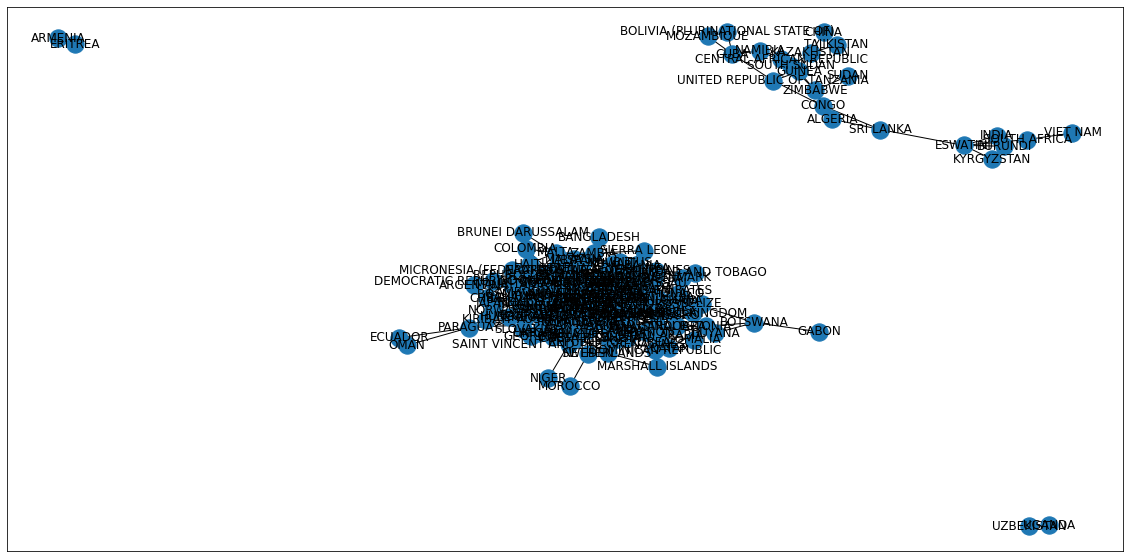

In [1274]:
figure(figsize=(20, 10))
nx.draw_networkx(G_one_vote)

In [1254]:
nx.is_connected(G_one_vote)

False

In [1275]:
nx.number_connected_components(G_one_vote)

4

In [516]:
print(sorted(nx.connected_components(G_one_vote)))

[{'SENEGAL', 'PHILIPPINES', 'BELGIUM', 'MONTENEGRO', 'LIBYA', 'GAMBIA', 'NIGER', 'TONGA', 'GRENADA', 'ECUADOR', 'ARGENTINA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'COSTA RICA', 'UNITED KINGDOM', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'CHILE', 'BRAZIL', 'GABON', 'GREECE', 'NIGERIA', 'CHAD', 'SAN MARINO', 'SINGAPORE', 'MALDIVES', 'SOMALIA', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'LUXEMBOURG', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'SLOVAKIA', 'ITALY', 'BOTSWANA', 'OMAN', 'LATVIA', 'NETHERLANDS', 'NORWAY', 'TÜRKIYE', 'PORTUGAL', 'NAURU', 'COMOROS', 'PARAGUAY', 'NEW ZEALAND', 'INDONESIA', 'BOSNIA AND HERZEGOVINA', 'MALAWI', 'MALTA', 'BARBADOS', 'KENYA', 'BRUNEI DARUSSALAM', 'SLOVENIA', 'EGYPT', 'PERU', 'SWEDE

In [1266]:
country_arr_test = list(nx.connected_components(G_one_vote))[2]
print(country_arr_test)

{'TAJIKISTAN', 'ARMENIA'}


In [1073]:
print({'ERITREA', 'RUSSIAN FEDERATION', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'BELARUS', 'SYRIAN ARAB REPUBLIC'})

{'ERITREA', 'RUSSIAN FEDERATION', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'BELARUS', 'SYRIAN ARAB REPUBLIC'}


In [996]:
country_name = 'TURKIYE'
#country_name = 'RUSSIAN FEDERATION'
#country_name = 'UKRAINE'

if country_name in country_arr_test: print('True')
else: print('False')

False
